# <center> <font style="color:rgb(100,109,254)">Morphological Operations</font>  <center>

Morphological operations are simple operations which are mostly used to get our desired mask and get rid of noise. Its very commonly used in many preprocessing pipeline and  it is normally performed on binary images. It needs two inputs, one is our image and a  kernel (also called a structering element) which decides the nature of operation. Two very common morphological operation are Erosion and Dilation. Then there are other variants Opening, Closing, Gradient etc.

In [130]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## <font style="color:rgb(134,19,348)">Structuring Element</font>
Now before we get into some common morphological operations lets talk about the Structuring element also called a kernel. Now this goes over the image and performs operations, we have already seen how a kernel performs image sharpening etc. Now Mostly we will be using a square kernel which can be constructed like this: `kernel = np.ones((5,5),np.uint8)`  

We just made a square 5x5 kernel now opencv has a function called `cv2.getStructuringElement()` which can be used to construct other type of kernels

[```retval = cv2.getStructuringElement(	shape, ksize[, anchor])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc)

- **`shape`**	Element shape that could be one of MorphShapes these are  `cv2.MORPH_RECT` ,  `cv2.MORPH_CROSS
` , `cv2.MORPH_ELLIPSE` 
- **`ksize`**	Size of the structuring element.
- **`anchor`**	Anchor position within the element. The default value (−1,−1) means that the anchor is at the center. Note that only the shape of a cross-shaped element depends on the anchor position. In other cases the anchor just regulates how much the result of the morphological operation is shifted.

lets make an cross structuring element of size 5x5

In [131]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
print(kernel)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


**Now differnt kernel shapes and sizes will yeild differnt results. For most part we will be use rectangular kernels constructed with np.ones()**

##  <font style="color:rgb(134,19,348)"> Erosion 
 The fundamental idea of erosion is just like how it sounds, it erodes (eats away or eliminates) away the boundaries of foreground object (Always try to keep foreground in white). So what it essentially does is that The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). <br><br> So what happens is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises.
 

[```dst = cv.erode(	src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]	)```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb)

- `src`	input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- `dst`	output image of the same size and type as src.
- `kernel`	structuring element used for erosion; if None , a 3 x 3 rectangular structuring element is used. Kernel can be created using getStructuringElement.
- `anchor`	position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
- `iterations`	number of times erosion is applied.
- `borderType`	pixel extrapolation method, see BorderTypes
- `borderValue`	border value in case of a constant border

In [132]:
kernel = np.ones((5,5),np.uint8)  
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


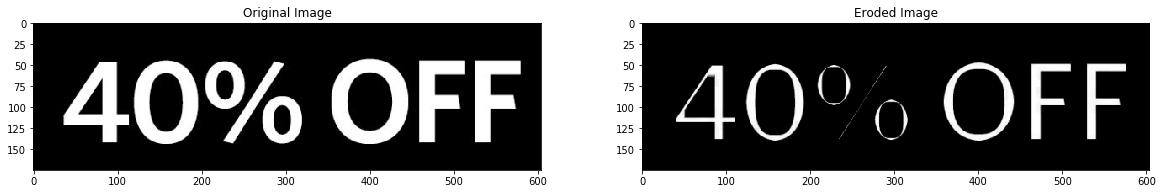

In [133]:
img = cv2.imread('media/M4/text.jpg',0)
erosion = cv2.erode(img,kernel,iterations = 2)

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(122);plt.imshow(erosion[:,:],cmap='gray');plt.title("Eroded Image");

See how the boundries have became thinner, you can try a different kernel shape and size to see how the results changes.

### </font><font style="color:rgb(134,19,348)">Eliminating White Noise with Erosion   </font>
Now as previously mentioned this erosion helps us remove noise, remember when we did color segmentation there was a lot of noise (white blobs), now with erosion you can erode away those white blobs. Below we have an example of image with white noise and how we eliminate it with erosion

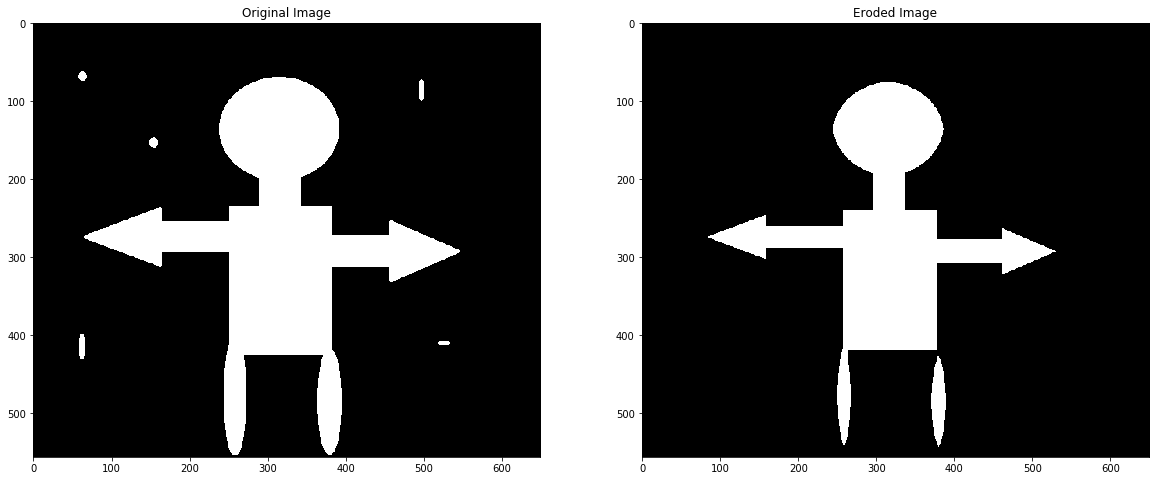

In [134]:
img = cv2.imread('media/M4/whitenoise.png',0)
kernel = np.ones((7,7),np.uint8)  
erosion = cv2.erode(img,kernel,iterations = 2)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(122);plt.imshow(erosion[:,:],cmap='gray');plt.title("Eroded Image");

See how we successfully eliminated the noise, but we have a problem now our object has become thinner. We can actully solve this problem by dilating (expanding) the object.

#  <font style="color:rgb(134,19,348)"> Dilation </font>
It is just the opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. So essentially this expands the boundry of Objects. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object like we have seen in our example. So now we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

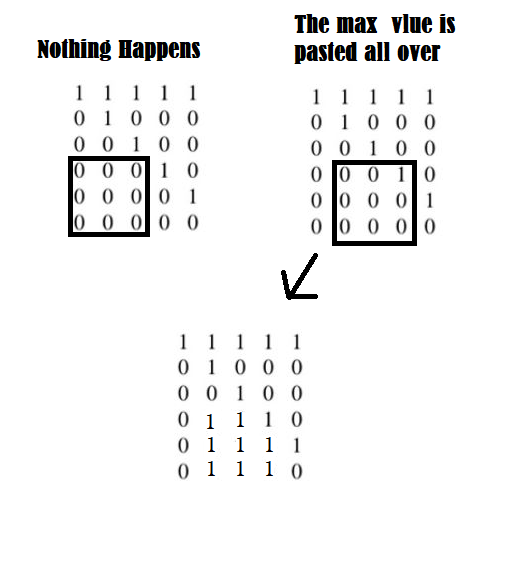

[```dst = cv.dilate(	src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]	)```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)

- `src`	input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- `dst`	output image of the same size and type as src.
- `kernel`	structuring element used for dilation; if None , a 3 x 3 rectangular structuring element is used. Kernel can be created using getStructuringElement.
- `anchor`	position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
- `iterations`	number of times dilation is applied.
- `borderType`	pixel extrapolation method, see BorderTypes
- `borderValue`	border value in case of a constant border


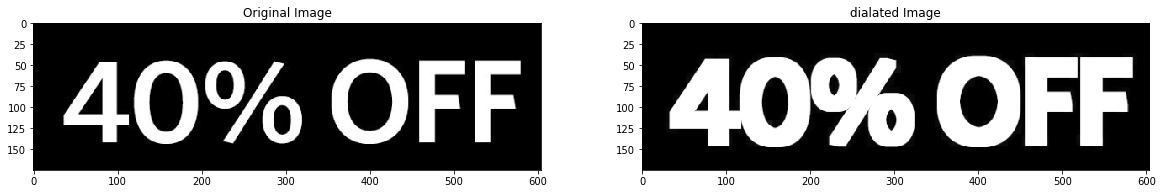

In [135]:
img = cv2.imread('media/M4/text.jpg',0)

kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 2)

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(122);plt.imshow(dilation[:,:],cmap='gray');plt.title("dialated Image");

### </font><font style="color:rgb(134,19,348)">Eliminating Black holes with Dilation   </font>
Now there are mostly two types of noises one is white noise and the other is black noise or holes, now these are typically refered as gaps in the object segmentation mask and its fairly common, for example in our color segmentation there were also gaps in our red object, now these gaps need to be filled and this can be done by Dilation

*Catchy subtile huh*

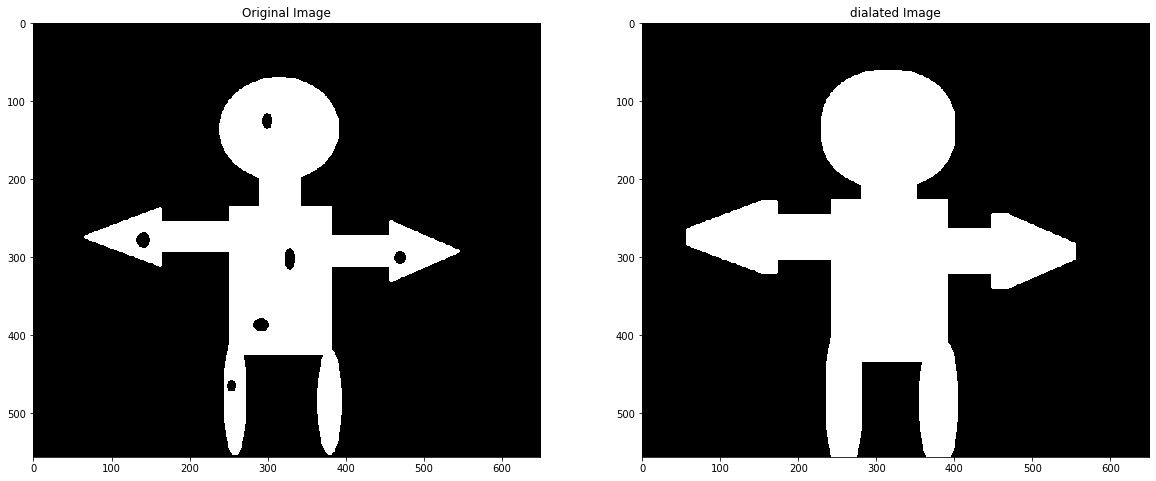

In [136]:
img = cv2.imread('media/M4/blacknoise.png',0)

kernel = np.ones((7,7),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 3)

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(122);plt.imshow(dilation[:,:],cmap='gray');plt.title("dialated Image");

Now the holes are gone but it expands our Object so now we need to perform erosion to fix this, normally you would do erosion 
after dilation for black spots and dilation after erosion for white spots

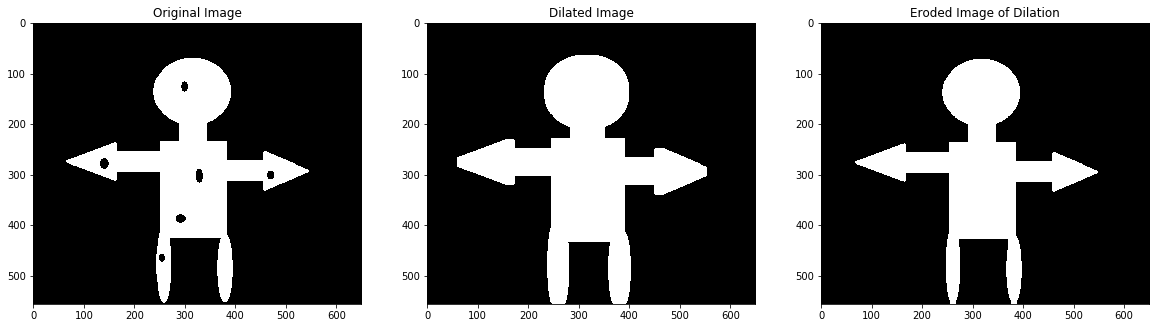

In [138]:
img = cv2.imread('media/M4/blacknoise.png',0)

kernel = np.ones((8,8),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 2)
dilation_eroded = cv2.erode(dilation,kernel,iterations = 2)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(132);plt.imshow(dilation[:,:],cmap='gray');plt.title("Dilated Image");
plt.subplot(133);plt.imshow(dilation_eroded[:,:],cmap='gray');plt.title("Eroded Image of Dilation");

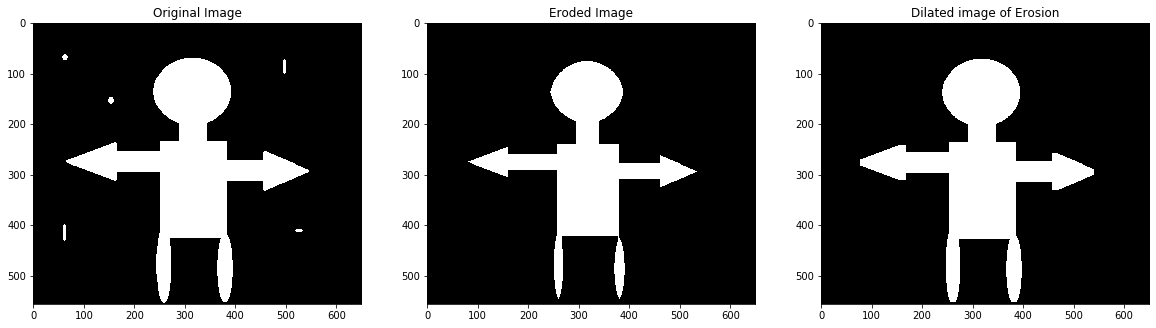

In [139]:
img = cv2.imread('media/M4/whitenoise.png',0)

kernel = np.ones((6,6),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 2)
erosion_dilated = cv2.dilate(erosion,kernel,iterations = 2)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(132);plt.imshow(erosion[:,:],cmap='gray');plt.title("Eroded Image");
plt.subplot(133);plt.imshow(erosion_dilated[:,:],cmap='gray');plt.title("Dilated image of Erosion");

## </font><font style="color:rgb(134,19,348)"> Opening & Closing  </font>

Now the above combined operations can be performed by `Opening` and `Closing`

[```dst = cv.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f)

**Parameters**

- `src`	input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- `op`	Type of a morphological operation for opening you do `cv2.MORPH_OPEN` for closing `cv2.MORPH_CLOSE`
- `dst`	output image of the same size and type as src.
- `kernel`	structuring element, Kernel can be created using getStructuringElement.
- `anchor`	position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
- `iterations`	number of times operation is performed.
- `borderType`	pixel extrapolation method, see BorderTypes
- `borderValue`	border value in case of a constant border



##  <font style="color:rgb(134,19,348)"> Opening </font>
Opening is a morphological operation which is just another name for erosion followed by dilation. you use `cv2.MORPH_OPEN` to achieve this

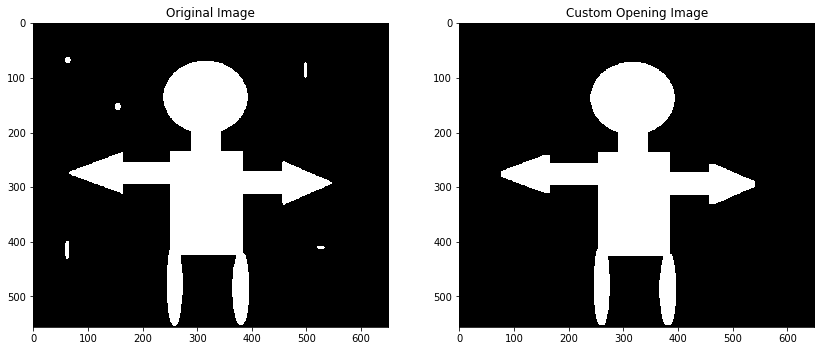

In [140]:
img = cv2.imread('media/M4/whitenoise.png',0)

kernel = np.ones((6,6),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations = 2)

plt.figure(figsize=[14,14])
plt.subplot(121);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(122);plt.imshow(opening[:,:],cmap='gray');plt.title("Custom Opening Image");

##  <font style="color:rgb(134,19,348)"> Closing </font>
Closing is a morphological operation which is just another name for dilation followed by erosion. You use `cv2.MORPH_CLOSE` to achieve this

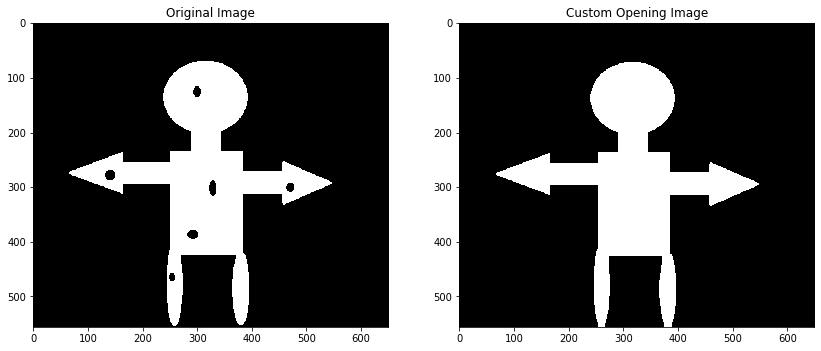

In [141]:
img = cv2.imread('media/M4/blacknoise.png',0)

kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel,iterations = 2)

plt.figure(figsize=[14,14])
plt.subplot(121);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(122);plt.imshow(closing[:,:],cmap='gray');plt.title("Custom Opening Image");

**Note:** When you specify iterations = 3 or any number for say opening it first performs erosion 3 times and then dilation 3 times

### </font><font style="color:rgb(134,19,348)">Morphological Gradient   </font>
Now there also another operation called morphological gradient which is just dilation - erosion, so this gives you the outline/gradient of the object, or the edges. For this you just pass in `cv2.MORPH_GRADIENT`

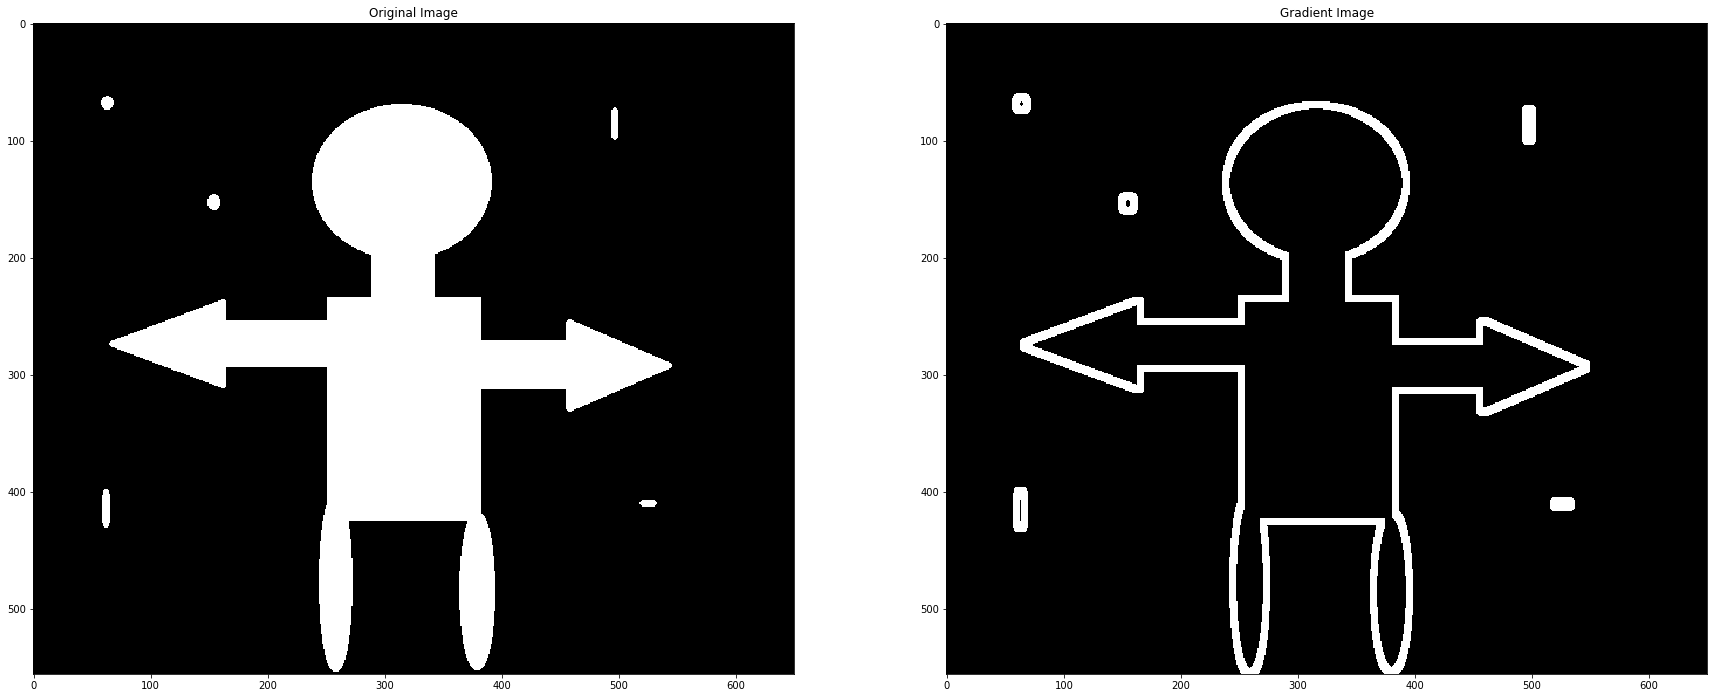

In [142]:
img = cv2.imread('media/M4/whitenoise.png',0)
kernel = np.ones((4,4),np.uint8) 

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel,iterations = 2)

plt.figure(figsize=[30,20])
plt.subplot(121);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(122);plt.imshow(gradient[:,:],cmap='gray');plt.title("Gradient Image");

You can also do this Manually

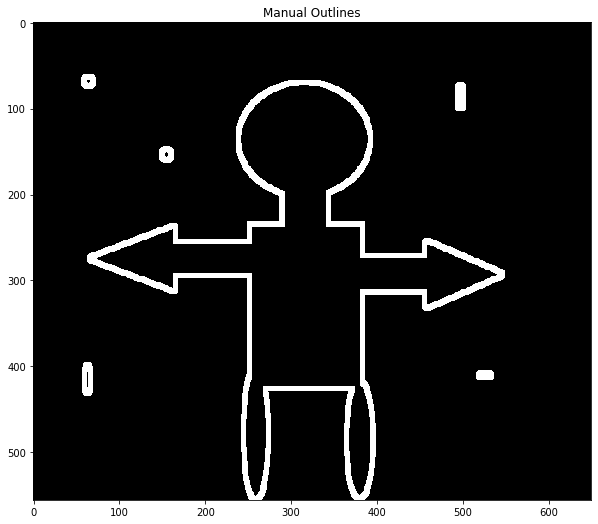

In [143]:
img = cv2.imread('media/M4/whitenoise.png',0)

kernel = np.ones((4,4),np.uint8)  #increase the kernel size

dilation = cv2.dilate(img,kernel,iterations = 2)
erosion = cv2.erode(img,kernel,iterations = 2)


outline = dilation - erosion
plt.figure(figsize=[10,10])
plt.imshow(outline[:,:],cmap='gray');plt.title("Manual Outlines");

### </font><font style="color:rgb(134,19,348)">  Erosion Dilation on Color & GrayScale images </font>
Erosion and dilation is not usually performed on grayscale or color images but its entirely possible to do so and here's how the results would look.

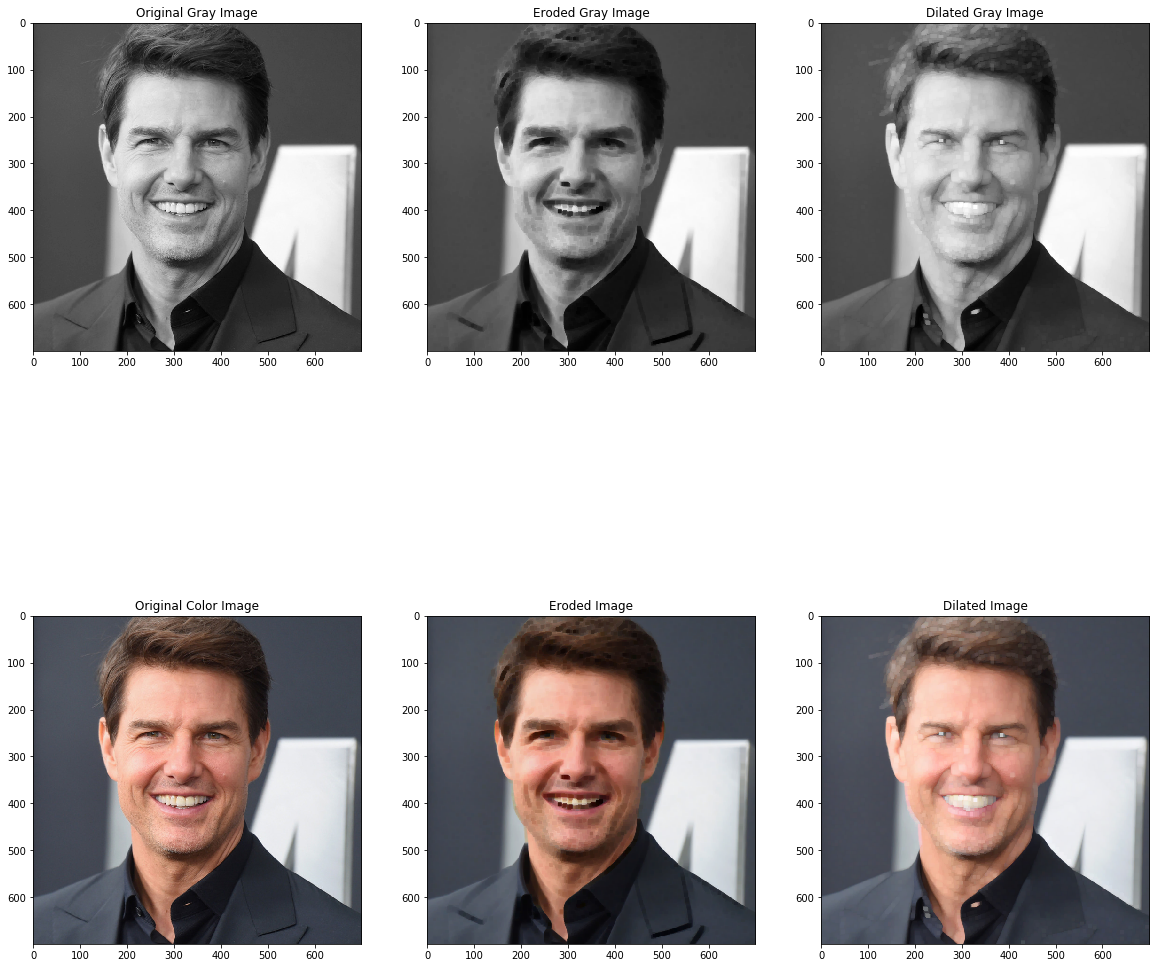

In [144]:
img = cv2.imread('media/M4/tomface1.jpg')
kernel = np.ones((4,4),np.uint8)  

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

erosion_gray = cv2.erode(gray,kernel,iterations = 2)
dilation_gray = cv2.dilate(gray,kernel,iterations = 2)

erosion = cv2.erode(img,kernel,iterations = 2)
dilation = cv2.dilate(img,kernel,iterations = 2)


plt.figure(figsize=[20,20])
plt.subplot(231);plt.imshow(gray[:,:],cmap='gray');plt.title("Original Gray Image");
plt.subplot(232);plt.imshow(erosion_gray[:,:],cmap='gray');plt.title("Eroded Gray Image");
plt.subplot(233);plt.imshow(dilation_gray[:,:],cmap='gray');plt.title("Dilated Gray Image");
plt.subplot(234);plt.imshow(img[...,::-1]);plt.title("Original Color Image");
plt.subplot(235);plt.imshow(erosion[...,::-1]);plt.title("Eroded Image");
plt.subplot(236);plt.imshow(dilation[...,::-1]);plt.title("Dilated Image");

## </font><font style="color:rgb(134,19,348)">  Note: </font>
In real world cases you will find that in object masks that you segment (via color or any other thing) you will have both white and black noises, so you have to very carefully select the kernel values and no of iterations for erosion and dilation. And they both can have differnt no of iterations etc, this is why I mostly use erosion and dilation rather than opening and closing as its gives more control.

### <font style="color:rgb(34,169,134)"> Assignment: Apply Morphological Operations to Clean a Segmented Mask </font>
**Segment an Object with its color (it can be anything a blue ball or something) and get rid of the noise in the binary mask using morphological operations.**

In [ ]:
# ADD CODE HERE

